<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/3_3_loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

%matplotlib inline

# 1. Entendimiento global



In [ ]:
#Cargamos el dataset

Train = pd.read_csv("https://raw.githubusercontent.com/armandoordonez/eda_couse/refs/heads/main/data/loan_prediction_train_es.csv")


In [ ]:
Train.head()

,ID_Prestamo,Genero,Casado,Dependientes,Educacion,Autonomo,Ingreso_Solicitante,Ingreso_CoSolicitante,Monto_Prestamo,Plazo_Prestamo,Historial_Crediticio,Area_Propiedad,Estado_Prestamo
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Prestamo            614 non-null    object 
 1   Genero                 601 non-null    object 
 2   Casado                 611 non-null    object 
 3   Dependientes           599 non-null    object 
 4   Educacion              614 non-null    object 
 5   Autonomo               582 non-null    object 
 6   Ingreso_Solicitante    614 non-null    int64  
 7   Ingreso_CoSolicitante  614 non-null    float64
 8   Monto_Prestamo         592 non-null    float64
 9   Plazo_Prestamo         600 non-null    float64
 10  Historial_Crediticio   564 non-null    float64
 11  Area_Propiedad         614 non-null    object 
 12  Estado_Prestamo        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
Train.describe()

,Ingreso_Solicitante,Ingreso_CoSolicitante,Monto_Prestamo,Plazo_Prestamo,Historial_Crediticio
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Variables categóricas

**Análisis univariado**

In [ ]:
#Genero
Train.Genero.value_counts(normalize=True)

,proportion
Genero,
Male,0.813644
Female,0.186356


<Axes: title={'center': 'Genero'}, xlabel='Genero'>

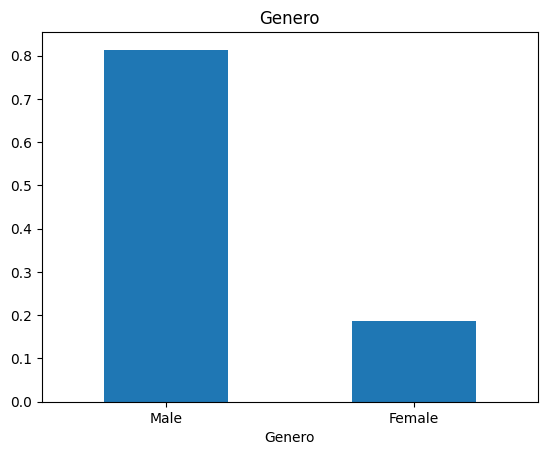

In [ ]:
Train.Genero.value_counts(normalize=True).plot.bar(title = "Genero",rot=0)

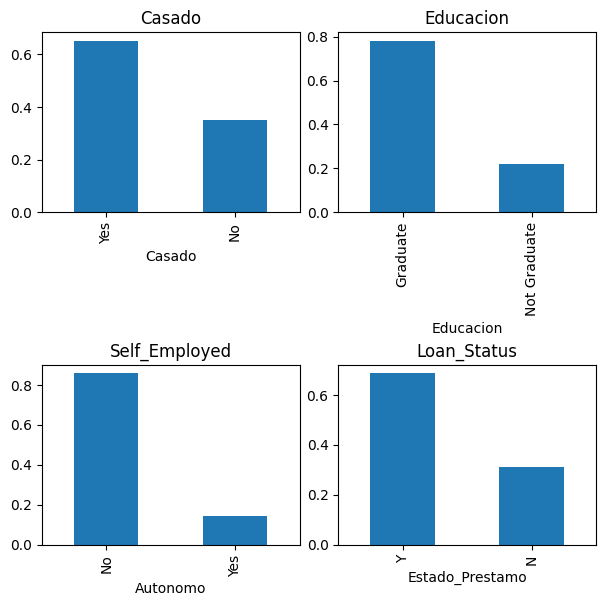

In [ ]:
plt.subplot(221)
Train.Casado.value_counts(normalize=True).plot(kind = 'bar', title = "Casado",figsize=(6,6))
plt.tight_layout(pad=0.5)

plt.subplot(222)
Train.Educacion.value_counts(normalize=True).plot(kind = 'bar', title = "Educacion")
plt.tight_layout(pad=0.5)

plt.subplot(223)
Train.Autonomo.value_counts(normalize=True).plot(kind = 'bar',title = "Self_Employed")
plt.tight_layout(pad=0.5)

plt.subplot(224)
Train.Estado_Prestamo.value_counts(normalize=True).plot(kind = 'bar',title = "Estado_Prestamo")
plt.tight_layout(pad=0.5)

# Conclusiones

El 80% de los solicitantes de préstamos son hombres en el conjunto de datos de capacitación.
Casi el 70% están casados.
Alrededor del 75% de los solicitantes de préstamos son graduados
Casi el 85-90% de los solicitantes de préstamos trabajan por cuenta propia
El préstamo ha sido aprobado para más del 65% de los solicitantes.

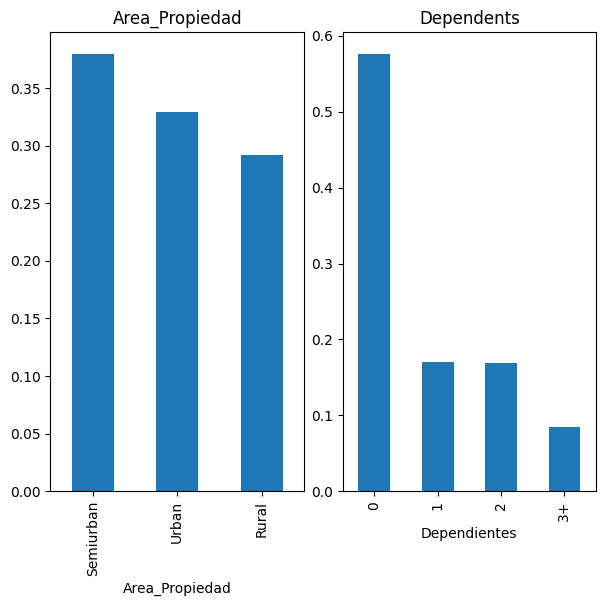

In [ ]:
plt.subplot(121)
Train.Area_Propiedad.value_counts(normalize=True).plot(kind = 'bar',title = "Area_Propiedad",figsize=(6,6))
plt.tight_layout(pad=0.5)

plt.subplot(122)
Train.Dependientes.value_counts(normalize = True).plot(kind='bar',title="Dependents")
plt.tight_layout(pad=0.5)

Casi el 58% de los solicitantes no tienen dependientes.
El mayor número de solicitantes son de áreas semiurbanas, seguidas de áreas urbanas.

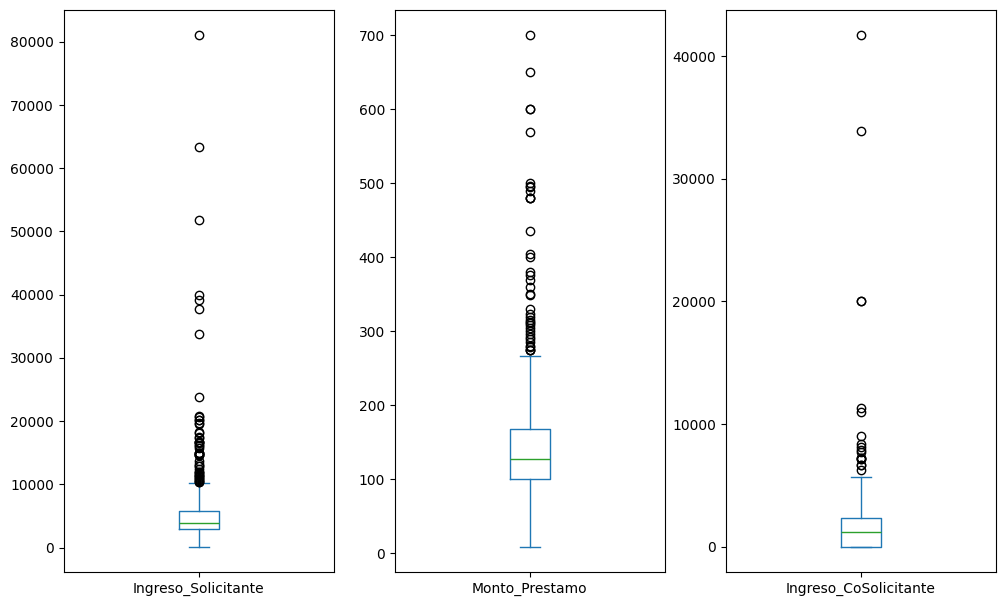

In [ ]:


plt.subplot(131)
Train['Ingreso_Solicitante'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)

plt.subplot(132)
Train['Monto_Prestamo'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(133)
Train['Ingreso_CoSolicitante'].plot.box()
plt.tight_layout(pad=0.5)

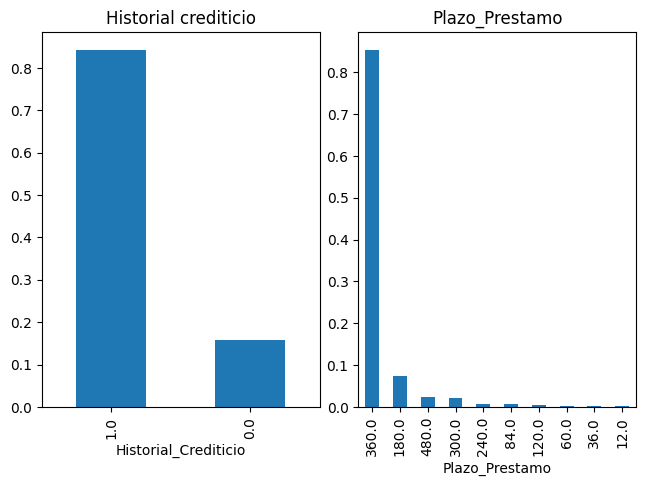

In [ ]:
plt.subplot(121)
Train.Historial_Crediticio.value_counts(normalize = 'True').plot(kind = 'bar', title='Historial crediticio')
plt.tight_layout(pad=0.5)


plt.subplot(122)
Train.Plazo_Prestamo.value_counts(normalize = 'True').plot(kind = 'bar', title='Plazo_Prestamo')
plt.tight_layout(pad=0.5)

# Análisis multivariado


Hipótesis:

* Los solicitantes con mayores ingresos pueden tener más posibilidades de obtener la aprobación .
*Los solicitantes con menos dependientes y mayores ingresos de cosolicitantes podrían tener más posibilidades de obtener aprobaciones de préstamos.
*Los solicitantes que son graduados tienden a ganar más y, por lo tanto, tienen tasas de aprobación de préstamos más altas.
*Los solicitantes que están casados ​​pueden parecer más responsables, por lo tanto, mayores posibilidades de aprobación del préstamo.
*Los solicitantes que no trabajan por cuenta propia pueden tener mayores posibilidades de aprobación del préstamo, ya que tienden a tener una fuente de ingresos constante. Hay menos incertidumbre, diría yo.
*Los candidatos con propiedades en áreas urbanas podrían tener mayores posibilidades de aprobación del préstamo, ya que el costo de la garantía sería alto.
*Un buen historial crediticio definitivamente debe correlacionarse con la aprobación del préstamo.
* Para Género, no tengo nada específico en mente, pero digamos que las mujeres tienden a ser más responsables y, por lo tanto, tienen altos índices de aprobación. (PD: Sin odio).

<Axes: xlabel='Area_Propiedad', ylabel='count'>

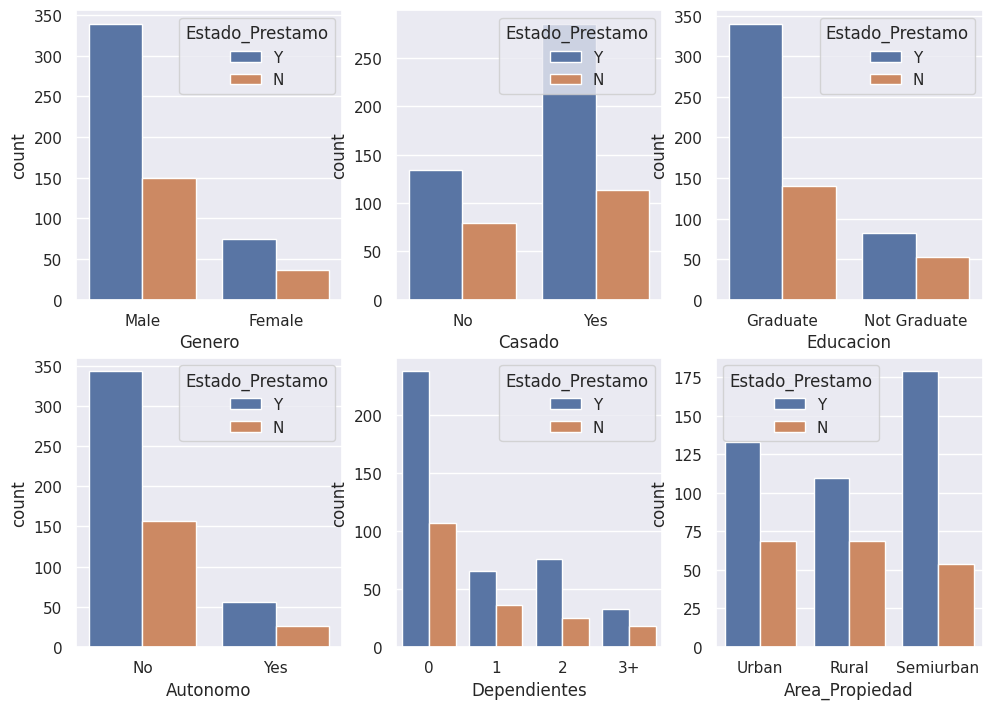

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(231)
sns.countplot(x="Genero", hue='Estado_Prestamo', data=Train)
plt.subplot(232)
sns.countplot(x="Casado", hue='Estado_Prestamo', data=Train)
plt.subplot(233)
sns.countplot(x="Educacion", hue='Estado_Prestamo', data=Train)
plt.subplot(234)
sns.countplot(x="Autonomo", hue='Estado_Prestamo', data=Train)
plt.subplot(235)
sns.countplot(x="Dependientes", hue='Estado_Prestamo', data=Train)
plt.subplot(236)
sns.countplot(x="Area_Propiedad", hue='Estado_Prestamo', data=Train)

# Conclusiones

No hay una diferencia sustancial entre las tasas de aprobación de hombres y mujeres.
Los solicitantes casados ​​tienen posibilidades ligeramente más altas de aprobación del préstamo.
Los graduados tienen mayores posibilidades de aprobación de préstamos en comparación con los no graduados.
No hay una diferencia sustancial en las tasas de aprobación de préstamos para autónomos y no autónomos.
Los solicitantes sin dependientes o con 2 dependientes tienen mayores posibilidades de aprobación. Pero esto no se correlaciona bien.
Los solicitantes con propiedades en áreas semiurbanas tienen tasas de aprobación de préstamos más altas.

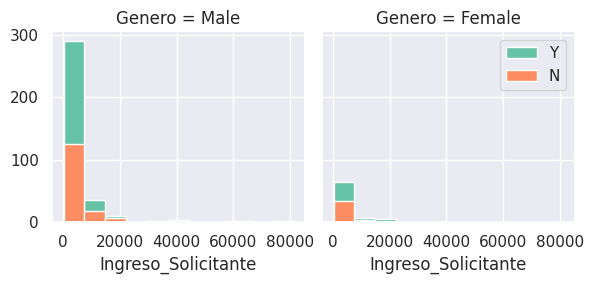

In [ ]:
bins = np.linspace(Train.Ingreso_Solicitante.min(), Train.Ingreso_Solicitante.max(),12)
graph = sns.FacetGrid(Train, col="Genero", hue="Estado_Prestamo", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'Ingreso_Solicitante', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

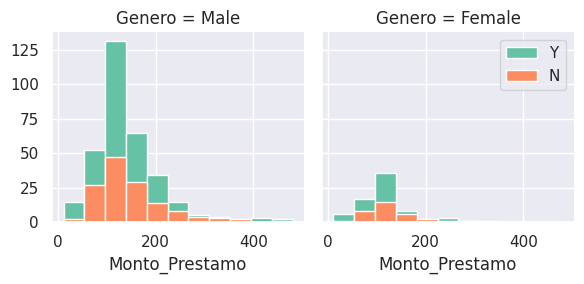

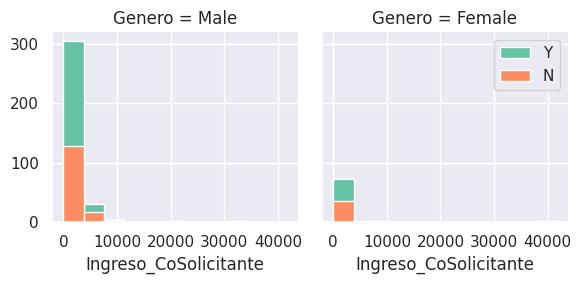

In [ ]:
bins = np.linspace(Train.Plazo_Prestamo.min(), Train.Plazo_Prestamo.max(),12)
graph = sns.FacetGrid(Train, col="Genero", hue="Estado_Prestamo", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'Monto_Prestamo', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()
bins = np.linspace(Train.Ingreso_CoSolicitante.min(), Train.Ingreso_CoSolicitante.max(),12)
graph = sns.FacetGrid(Train, col="Genero", hue="Estado_Prestamo", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'Ingreso_CoSolicitante', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

# Conclusiones

Las mujeres con ingresos superiores a 7000 tienen mayores posibilidades de aprobación del préstamo

Las mujeres parecen prestar menos cantidad que los hombres

El ingreso de los solicitantes para las candidatas es menor en comparación con los hombres. Sin embargo, no refleja mucho sobre el estado del préstamo.

#Taller
1. Desarrollar mas graficos con otros predictores como casado, autonomo,etc.



In [ ]:
# Select only numeric columns before calculating the correlation
numeric_columns = Train.select_dtypes(include=np.number).columns
correlation_mat = Train[numeric_columns].corr()


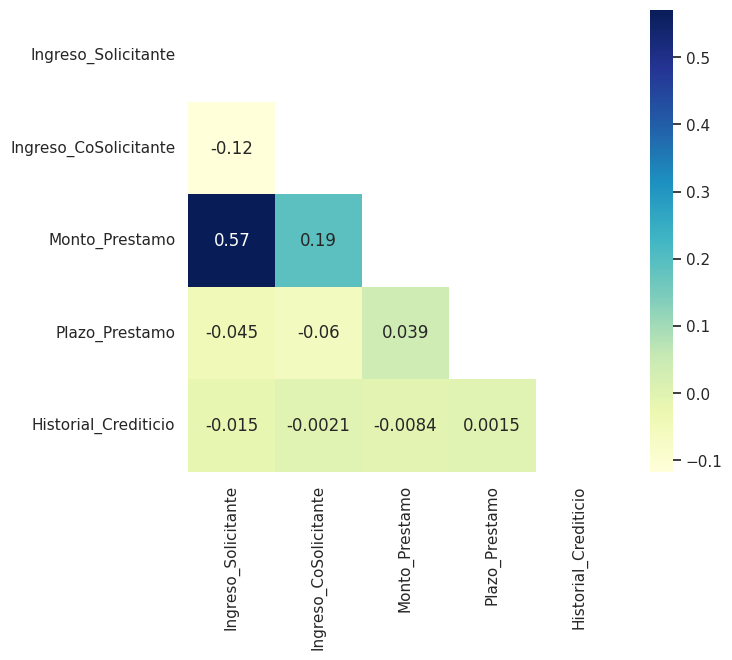

In [ ]:
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,6))
    ax = sns.heatmap(correlation_mat,
mask=mask,annot=True,cmap="YlGnBu")

# Conclusiones

Existe una correlación positiva entre Ingreso_Solicitante y Cantidad del prestamo, Ingreso_CoSolicitante y Cantidad del prestamo .

In [ ]:

# Based on: https://towardsdatascience.com/an-introduction-to-exploratory-data-analysis-in-python-9a76f04628b8